In [ ]:
import json
import time
import networkx as nx
from itertools import combinations
from datetime import datetime
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from cdlib import algorithms, viz

#build permette di definire il punto di accesso da cui invocare i diversi endpoint delle YouTube API.
from googleapiclient.discovery import build

Note: to be able to use all crisp methods, you need to install some additional packages:  {'infomap', 'bayanpy', 'leidenalg', 'graph_tool', 'wurlitzer'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'pyclustering', 'ASLPAw'}
Note: to be able to use all crisp methods, you need to install some additional packages:  {'leidenalg', 'wurlitzer', 'infomap'}


In [ ]:
from feel_it import EmotionClassifier
from feel_it import SentimentClassifier

/shared-libs/python3.9/py/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Carico dict e grafo

In [ ]:
with open('muschio_dict.json', 'r') as json_file:
    muschio_dict = json.load(json_file)

muschio_net = nx.read_gexf('muschio_net.gexf')

In [ ]:
with open('muschio_dict_sentiment.json', 'r') as json_file:
    muschio_dict_sentiment = json.load(json_file)

### Sentiment analysis

In [ ]:
emotion_clf = EmotionClassifier()
sentiment_clf = SentimentClassifier()

/root/venv/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


### prova

In [ ]:
# Estrai il primo video dal dizionario
first_video_key = next(iter(muschio_dict))
first_video_comments_data = muschio_dict[first_video_key]['commenters']
first_video_comments = [comment[1] for comment in first_video_comments_data]  # Estrarre solo il testo del commento

# Prendi solo i primi 10 commenti
first_ten_comments = first_video_comments[:10]

# Istanza del classificatore di sentiment
sentiment_clf = SentimentClassifier()

# Analizza i commenti
if first_ten_comments:
    sentiment_results = sentiment_clf.predict(first_ten_comments)

    # Stampa i risultati
    for comment, sentiment in zip(first_ten_comments, sentiment_results):
        print(f"Comment: {comment}\nSentiment: {sentiment}\n")
else:
    print("Nessun commento disponibile per l'analisi.")

Comment: Evvai
Sentiment: positive

Comment: Certo che i fan di tintoria sembrano un&#39; accozzaglia di imbecilli a giudicare dai commenti, non so se è perché hanno tredici anni o perché sono di Roma🤔
Sentiment: negative

Comment: Ma che cazzo dicono che coi tedeschi si parla solo di nazismo. Che provinciali ahah
Sentiment: negative

Comment: Quando la puntata con fedez?
Sentiment: positive

Comment: E niente, non bastano Tinti e Rapone a evitare il grattugiamento di scatole nel guardare questo podcast
Sentiment: negative

Comment: Tintoria &gt; Muschio selvaggio
Sentiment: negative

Comment: Ahahahahahhaha la puntata più divertente di tutte!😂😂
Sentiment: positive

Comment: <a href="https://www.youtube.com/watch?v=tem_iCzlHbI&amp;t=2436">40:36</a><br>fritz da cat <br>o<br>catz the fritz?
Sentiment: positive

Comment: Fate conto che Muschio Selvaggio sia il web...
Sentiment: positive

Comment: Io non ci sto capendo più niente, ma chi conduce muschio selvaggio?
Sentiment: negative



### tentativo  + leggero 

In [ ]:
batch_size = 50

# Funzione per processare un sottoinsieme di video
def process_videos(video_subset):
    for video_id, video_data in video_subset.items():
        total_comments = len(video_data['commenters'])
        for start_idx in range(0, total_comments, batch_size):
            end_idx = min(start_idx + batch_size, total_comments)
            batch_comments = [comment[1] for comment in video_data['commenters'][start_idx:end_idx]]

            if batch_comments:
                sentiments = sentiment_clf.predict(batch_comments)
                for i, sentiment in enumerate(sentiments):
                    video_data['commenters'][start_idx + i].append(sentiment)
                    #print(video_data['commenters'])

prova su id specifico

In [ ]:
# Specifica l'ID del video da processare
video_id = 'tem_iCzlHbI'

# Assicurati che l'ID del video sia presente nel dizionario
if video_id in muschio_dict:
    video_to_process = {video_id: muschio_dict[video_id]}
    process_videos(video_to_process)
else:
    print("L'ID del video non è stato trovato nel dizionario.")


### nuovo tentativo con macchina pimped

In [ ]:
batch_size = 50

# Funzione per processare un sottoinsieme di video
def process_videos(video_subset):
    for video_id, video_data in video_subset.items():
        total_comments = len(video_data['commenters'])
        for start_idx in range(0, total_comments, batch_size):
            end_idx = min(start_idx + batch_size, total_comments)
            batch_comments = [comment[1] for comment in video_data['commenters'][start_idx:end_idx]]

            if batch_comments:
                sentiments = sentiment_clf.predict(batch_comments)
                for i, sentiment in enumerate(sentiments):
                    video_data['commenters'][start_idx + i].append(sentiment)

# Processa tutti i video nel dizionario
def process_all_videos():
    process_videos(muschio_dict)
    print("Elaborazione completata per tutti i video.")

# Chiama la funzione per processare tutti i video
process_all_videos()


Elaborazione completata per tutti i video.


In [ ]:
with open('muschio_dict_sentiment.json', 'w') as json_file:
    json.dump(muschio_dict, json_file, indent=4)

### Analisi semplice dei sentiment

Quanti sono?

In [ ]:
# Inizializza i contatori per i sentimenti positivi e negativi
positive_count = 0
negative_count = 0

# Itera attraverso tutti i video nel dizionario
for video_id, data in muschio_dict_sentiment.items():
    if 'commenters' in data:
        for comment in data['commenters']:
            if len(comment) > 2:  # Assicurati che il sentiment sia presente
                sentiment = comment[2]
                if sentiment == 'positive':
                    positive_count += 1
                elif sentiment == 'negative':
                    negative_count += 1

# Stampa i risultati
print(f"Numero di sentimenti positivi: {positive_count}")
print(f"Numero di sentimenti negativi: {negative_count}")


Numero di sentimenti positivi: 8731
Numero di sentimenti negativi: 11269


### Analisi temporale - sentiment

### step 1 - identifico le fasi temporali

In [ ]:
import re
from datetime import datetime

# Variabili per le date di inizio e fine di ogni fase
phase1_start = phase1_end = None
phase2_start = phase2_end = None
phase3_start = phase3_end = None
phase4_start = phase4_end = None

# Estrazione delle date basate sui titoli degli episodi
for video_id, data in muschio_dict.items():
    if 'details' in data and 'published_at' in data['details'] and 'title' in data['details']:
        match = re.search(r'Ep\.\s*(\d+)', data['details']['title'])
        if match:
            episode_number = int(match.group(1))
            date = datetime.strptime(data['details']['published_at'], '%Y-%m-%d %H:%M:%S')
            if episode_number == 57:
                phase1_start = date
            elif episode_number == 112:
                phase1_end = phase2_start = date
            elif episode_number == 120:
                phase2_end = phase3_start = date
            elif episode_number == 147:
                phase3_end = phase4_start = date
            elif episode_number == 155:
                phase4_end = date

print(f"Phase 1: {phase1_start} to {phase1_end}")
print(f"Phase 2: {phase2_start} to {phase2_end}")
print(f"Phase 3: {phase3_start} to {phase3_end}")
print(f"Phase 4: {phase4_start} to {phase4_end}")


Phase 1: 2021-05-31 14:14:55 to 2023-01-30 13:08:35
Phase 2: 2023-01-30 13:08:35 to 2023-05-08 12:03:01
Phase 3: 2023-05-08 12:03:01 to 2024-03-25 11:00:00
Phase 4: 2024-03-25 11:00:00 to 2024-05-27 12:00:59


### step 2 - classificazione dei commenti in base alla fase temporale

In [ ]:
# Funzione per determinare a quale fase appartiene una data
def get_phase(date):
    if phase1_start and phase1_end and phase1_start <= date <= phase1_end:
        return 'Phase 1'
    elif phase2_start and phase2_end and phase2_start <= date <= phase2_end:
        return 'Phase 2'
    elif phase3_start and phase3_end and phase3_start <= date <= phase3_end:
        return 'Phase 3'
    elif phase4_start and phase4_end and phase4_start <= date <= phase4_end:
        return 'Phase 4'
    else:
        return None

# Inizializza i contatori per ciascuna fase
phase_sentiments = {
    'Phase 1': {'positive': 0, 'negative': 0},
    'Phase 2': {'positive': 0, 'negative': 0},
    'Phase 3': {'positive': 0, 'negative': 0},
    'Phase 4': {'positive': 0, 'negative': 0}
}

# Itera attraverso tutti i video nel dizionario
for video_id, data in muschio_dict_sentiment.items():
    if 'details' in data and 'published_at' in data['details'] and 'commenters' in data:
        date = datetime.strptime(data['details']['published_at'], '%Y-%m-%d %H:%M:%S')
        phase = get_phase(date)
        if phase:
            for comment in data['commenters']:
                if len(comment) > 2:  # Assicurati che il sentiment sia presente
                    sentiment = comment[2]
                    if sentiment == 'positive':
                        phase_sentiments[phase]['positive'] += 1
                    elif sentiment == 'negative':
                        phase_sentiments[phase]['negative'] += 1

# Stampa i risultati
for phase, counts in phase_sentiments.items():
    print(f"{phase} - Sentimenti positivi: {counts['positive']}, Sentimenti negativi: {counts['negative']}")


Phase 1 - Sentimenti positivi: 5157, Sentimenti negativi: 6243
Phase 2 - Sentimenti positivi: 832, Sentimenti negativi: 768
Phase 3 - Sentimenti positivi: 2076, Sentimenti negativi: 3324
Phase 4 - Sentimenti positivi: 666, Sentimenti negativi: 934


### step 3 - visualizzazione dei risultati

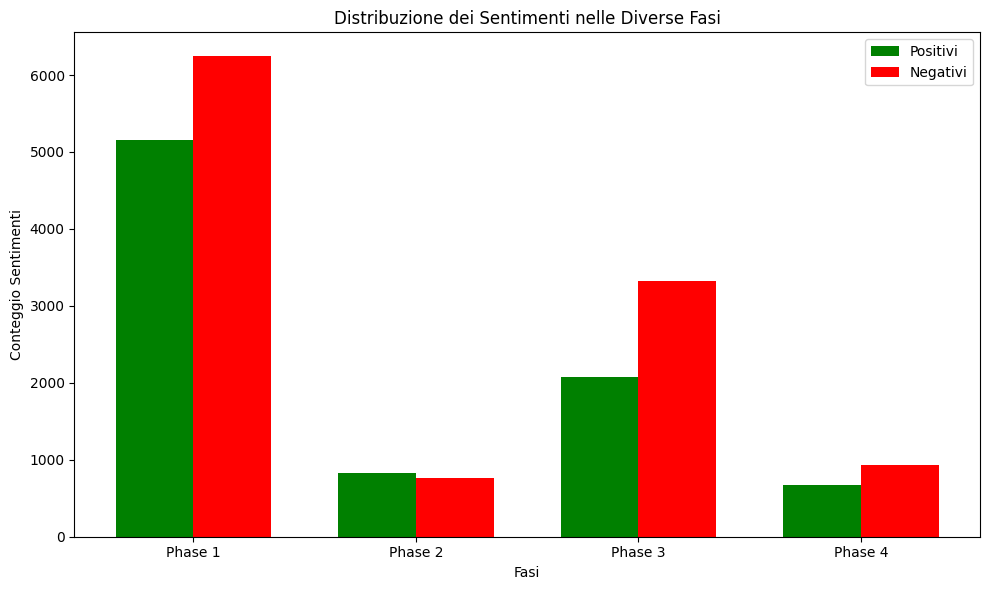

In [ ]:
import matplotlib.pyplot as plt

# Prepara i dati per il grafico
phases = list(phase_sentiments.keys())
positive_counts = [phase_sentiments[phase]['positive'] for phase in phases]
negative_counts = [phase_sentiments[phase]['negative'] for phase in phases]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = range(len(phases))

bar1 = ax.bar(index, positive_counts, bar_width, label='Positivi', color='g')
bar2 = ax.bar([i + bar_width for i in index], negative_counts, bar_width, label='Negativi', color='r')

ax.set_xlabel('Fasi')
ax.set_ylabel('Conteggio Sentimenti')
ax.set_title('Distribuzione dei Sentimenti nelle Diverse Fasi')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(phases)
ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Dati delle fasi
phase_sentiments = {
    'Phase 1': {'positive': 5157, 'negative': 6243},
    'Phase 2': {'positive': 832, 'negative': 768},
    'Phase 3': {'positive': 2076, 'negative': 3324},
    'Phase 4': {'positive': 666, 'negative': 934}
}

# Calcolo delle percentuali
for phase, counts in phase_sentiments.items():
    total = counts['positive'] + counts['negative']
    positive_percentage = (counts['positive'] / total) * 100
    negative_percentage = (counts['negative'] / total) * 100
    print(f"{phase} - Proporzione positivi: {positive_percentage:.2f}%, Proporzione negativi: {negative_percentage:.2f}%")


Phase 1 - Proporzione positivi: 45.24%, Proporzione negativi: 54.76%
Phase 2 - Proporzione positivi: 52.00%, Proporzione negativi: 48.00%
Phase 3 - Proporzione positivi: 38.44%, Proporzione negativi: 61.56%
Phase 4 - Proporzione positivi: 41.62%, Proporzione negativi: 58.38%


### Comunità sovrapposte

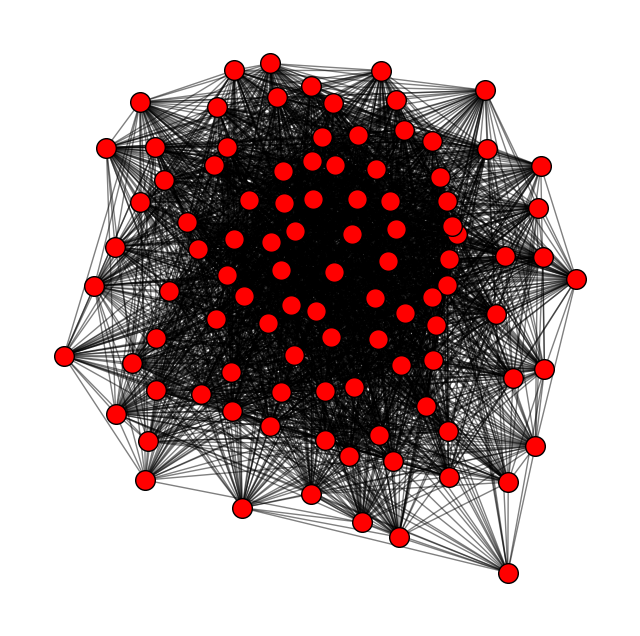

In [ ]:
# Applicazione dell'algoritmo di Label Propagation per comunità sovrapposte
communities = algorithms.label_propagation(muschio_net)

# Visualizzazione delle comunità
print(communities)

# Opzionalmente, visualizzare la rete con le sue comunità
viz.plot_network_clusters(muschio_net, communities, node_size=50, plot_overlaps=True)
